In [1]:
using PyCall, Plots, Images, MLDatasets, Colors

In [2]:
#PCA = pyimport("sklearn.decomposition").PCA

In [2]:
include("StackedPCA.jl")

transform (generic function with 1 method)

In [3]:
#using MultivariateStats

Importo MNIST

In [4]:
train_X, train_y = MNIST.traindata()
test_X, test_y = MNIST.testdata()

(N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

N0f8[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [5]:
N = 300

300

In [7]:
X = Float64.(permutedims(train_X,(3,2,1)));

In [8]:
X = reshape(X,(60_000, 1, 28, 28))[1:N,:,:,:];

<hr>

In [9]:
l1 = Layer(stride = (5,5), kernelshape = (7,7), nfilters = 1)
l2 = Layer(stride = (2,2), kernelshape = (3,3), nfilters = 1)

Layer((3, 3), (2, 2), 1, PyObject PCA(n_components=1))

In [10]:
l3 = Layer(stride = (1,1), kernelshape = (1,1), nfilters = 1)

Layer((1, 1), (1, 1), 1, PyObject PCA(n_components=1))

In [11]:
fit(l1, X)

PyObject PCA(n_components=1)

In [12]:
X1 = transform(l1, X);

In [13]:
fit(l2, X1)

PyObject PCA(n_components=1)

In [14]:
X2 = transform(l2, X1);

In [15]:
size(X2)

(300, 1, 2, 2)

In [16]:
fit(l3, X2)

PyObject PCA(n_components=1)

In [17]:
X3 = transform(l1, X2);

In [18]:
X3

300×1×0×0 Array{Float64, 4}

In [19]:
RGB.(X2[1,:,:,:])

1×2×2 Array{RGB{Float64},3} with eltype RGB{Float64}:
[:, :, 1] =
 RGB{Float64}(-0.353586,-0.353586,-0.353586)  …  RGB{Float64}(-0.251717,-0.251717,-0.251717)

[:, :, 2] =
 RGB{Float64}(-0.0741044,-0.0741044,-0.0741044)  …  RGB{Float64}(0.232756,0.232756,0.232756)

In [20]:
f(n) = [RGB(X2[n,:,i,j]...) for i in 1:2, j in 1:2]

f (generic function with 1 method)

In [21]:
train_y[1:10]

10-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4

In [22]:
c(n) = [i for i in 1:N if train_y[i] == n]

c (generic function with 1 method)

In [23]:
a, _, _, _ = size(X2)
X3 = PCA(n_components =  2).fit_transform(reshape(X2,(a,:)))

300×2 Matrix{Float64}:
  0.25448   -0.110041
 -0.596511   0.0562226
  1.76724    0.025318
 -0.596511   0.0562226
 -0.596161   0.0558976
 -0.584397   0.0467778
 -0.596511   0.0562226
 -0.472217   0.015805
 -0.596511   0.0562226
 -0.596511   0.0562226
 -0.596511   0.0562226
 -0.596511   0.0562226
  9.91553    1.11115
  ⋮         
  1.49294   -0.314927
 -0.596511   0.0562226
 -0.596511   0.0562226
 -0.596511   0.0562226
 -0.596511   0.0562226
 -0.43647   -0.00465843
  3.24372   -0.381339
 -0.596511   0.0562226
 -0.367153  -0.0542957
 -0.596511   0.0562226
  2.56372   -0.224942
 -0.564796   0.038753

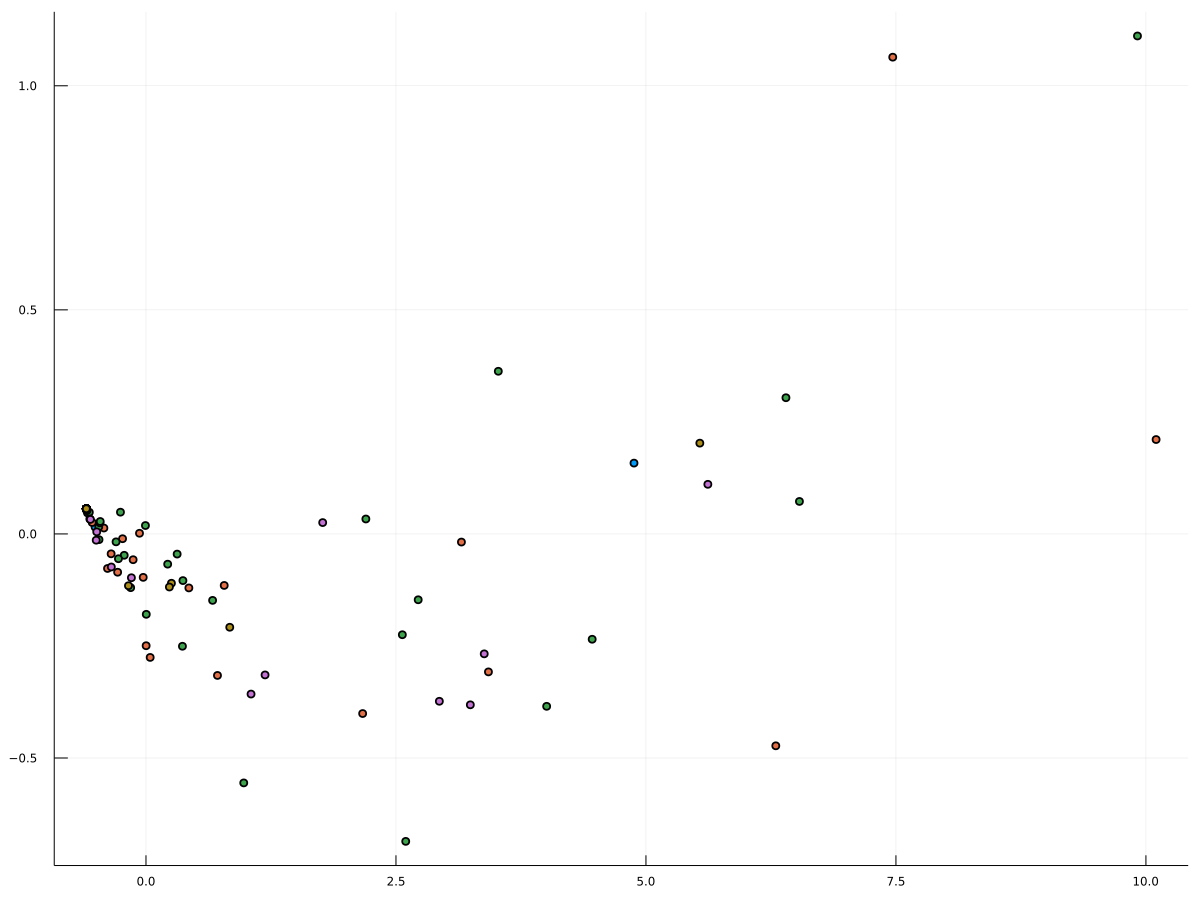

In [24]:
scatter(X3[c(1),1],X3[c(1),2], legend = false, size = (1200,900))
scatter!(X3[c(2),1],X3[c(2),2])
scatter!(X3[c(3),1],X3[c(3),2])
scatter!(X3[c(4),1],X3[c(4),2])
scatter!(X3[c(5),1],X3[c(5),2])


In [25]:
X2[c(4),1,2,1]

32-element Vector{Float64}:
  0.986239158960069
 -0.4982197753347508
  3.3270781673229806
 -0.4982197753347508
 -0.4982197753347508
  0.21158912155803716
  0.10405167090222943
 -0.4982197753347508
 -0.4982197753347508
 -0.49228874013687474
 -0.4982197753347508
 -0.4982197753347508
 -0.4982197753347508
  ⋮
 -0.4635794232454287
 -0.4982197753347508
  0.82637180000582
 -0.447090856809221
 -0.4982197753347508
 -0.4982197753347508
 -0.4259580373251915
 -0.4982197753347508
 -0.4982197753347508
 -0.4982197753347508
  1.7921682432070345
 -0.4982197753347508

<hr>

In [26]:
Xx = reshape(X,(N,28,28));

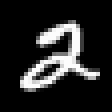

In [27]:
Gray.(Xx[6,:,:])

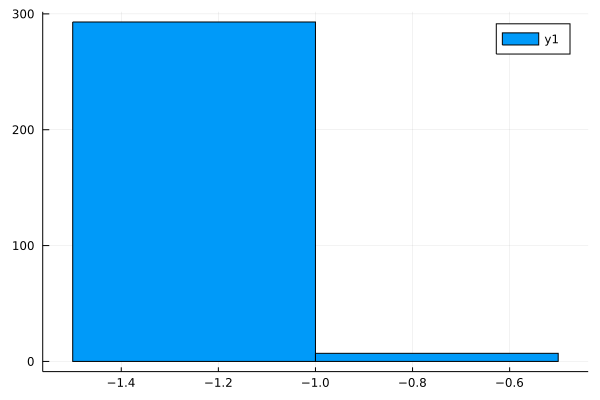

In [28]:
histogram(X1[:,:,1,1])

In [75]:
using StatsBase

In [80]:
size(X1)

(300, 1, 11, 11)

In [110]:
M = [StatsBase.var(X1[:,:,i,j]) for i in 11:-1:1, j in 1:11]

11×11 Array{Float64,2}:
 0.00180688   0.00824916   0.0281152    …  0.97217      0.972486
 0.00106636   0.00726401   0.0296208       0.938423     0.954457
 0.000850869  0.0050851    0.0234853       0.931069     0.952479
 0.00110506   0.00417079   0.0177143       0.873419     0.901285
 0.000721296  0.00228176   0.00988212      0.766875     0.828491
 0.00010075   0.000594534  0.0039623    …  0.620445     0.750345
 2.37606e-6   9.72347e-5   0.00113192      0.390787     0.534674
 0.0          2.79376e-5   0.000190743     0.178232     0.26016
 0.0          0.0          1.4125e-6       0.0545143    0.0813246
 0.0          0.0          0.0             0.010229     0.0146867
 0.0          0.0          0.0          …  0.000906671  0.00115096

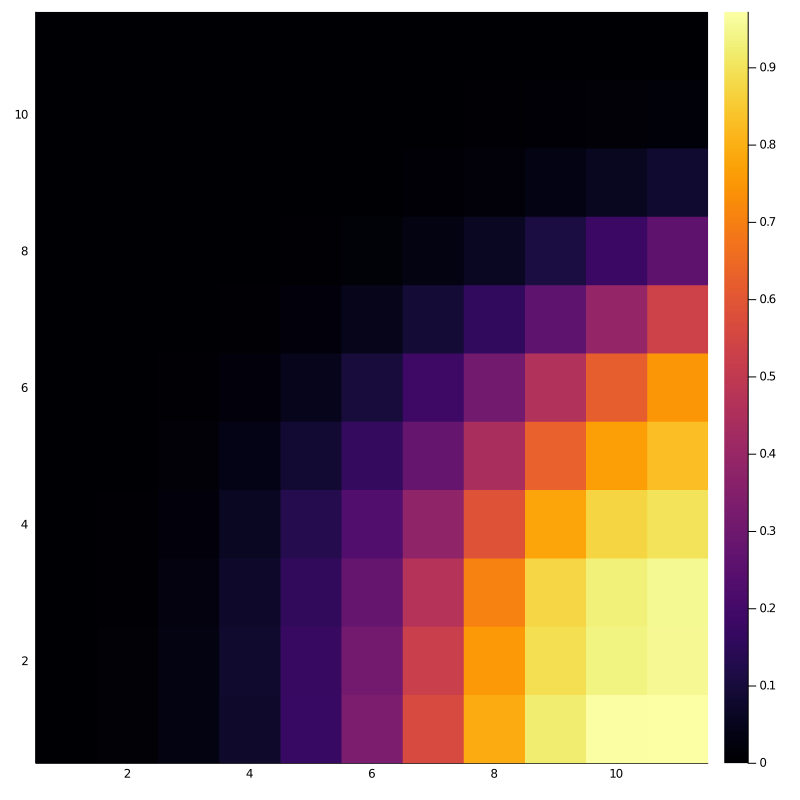

In [111]:
heatmap(M, size = (800,800))

<hr>

In [138]:
size(train_X)

(28, 28, 60000)

In [31]:
N = 5000

5000

In [32]:
X = permutedims(train_X, [3,2,1])[1:N,:,:];

In [34]:
rows = []
kh, kw = 7, 7
sh, sw = 5, 5
for i in 1:sh:(28-kh+1)
    for j in 1:sw:(28-kw+1)
        for n in 1:N
            push!(rows,X[n,i:(i+kh-1),j:(j+kw-1)][:])
        end
    end
end
data0 = hcat(rows...)'

125000×49 adjoint(::Array{N0f8,2}) with eltype N0f8:
 0.0    0.0    0.0    0.0    0.0  0.0  …  0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0  …  0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0  …  0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.0    0.0
 0.0    0.0    0.0    0.0    0.0  0.0     0.0  0.0  0.0  0.0  0.557  0.

In [29]:
model = PCA(n_components = 4)

PyObject PCA(n_components=4)

In [35]:
model.fit(data0)

PyObject PCA(n_components=4)

In [36]:
tr = model.transform(data0)

125000×4 Matrix{Float64}:
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.05313    0.0880647   0.0195644  -0.0624267
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -0.602357   0.858302    0.429744    0.759447
  ⋮                                 
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -1.1123    -0.0182019  -0.0387777  -0.184145
 -0.92691   -0.375055   -0.107489    0.331088
 -1.1123    -0.0

In [37]:
t(n, f = 1) = [model.transform(reshape(X[n,i:(i+kh-1),j:(j+kw-1)][:],(1,:)))[f] for i in 1:sh:(28-kh+1), j in 1:sw:(28-kw+1)]

t (generic function with 2 methods)

In [38]:
n = 3

3

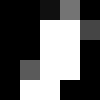

In [41]:
Gray.(t(8,1))

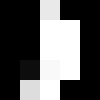

In [43]:
Gray.(t(11,1))

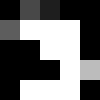

In [44]:
Gray.(t(13,1))

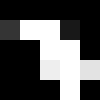

In [46]:
Gray.(t(31,1))

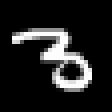

In [47]:
Gray.(X[31,:,:])

In [40]:
c(3)

493-element Vector{Int64}:
    8
   11
   13
   28
   31
   45
   50
   51
   75
   87
   99
  108
  112
    ⋮
 4879
 4882
 4884
 4892
 4899
 4918
 4938
 4957
 4958
 4967
 4989
 4997

<hr>

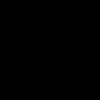

In [20]:
n = 10
Gray.(reshape(X1[9,:,:,:],(5,5)))